<a href="https://colab.research.google.com/github/StanleyNyadzayo/phd-xai-plan/blob/main/PIMA_Domain_knowledge%2BML_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
base = '/content/drive/MyDrive/Colab_Notebooks'
os.makedirs(base, exist_ok=True)
%cd /content/drive/MyDrive/Colab_Notebooks
!git clone https://github.com/ChristelSirocchi/medical-informed-ML.git


/content/drive/MyDrive/Colab_Notebooks
fatal: destination path 'medical-informed-ML' already exists and is not an empty directory.


In [30]:
!ls /content/drive/MyDrive/Colab_Notebooks/medical-informed-ML


PIMA_Domain_knowledge+ML_experiments.ipynb  README.md
pima-indians-diabetes.csv


In [31]:
import pandas as pd

dataset = pd.read_csv(
    '/content/drive/MyDrive/Colab_Notebooks/medical-informed-ML/pima-indians-diabetes.csv',
    delimiter=','
)

dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
dataset.shape
dataset.head()
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
#Replacing impossible zeros with NaN
import numpy as np

cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

dataset[cols_with_invalid_zeros] = dataset[cols_with_invalid_zeros].replace(0, np.nan)

dataset.isna().sum()



,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Impute missing Values (Simple Baseline)

In [34]:
dataset.fillna(dataset.median(), inplace=True)


In [35]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']


In [36]:
!pip install git+https://github.com/erdogant/bnlearn

  Cloning https://github.com/erdogant/bnlearn to /tmp/pip-req-build-y2ypos4b
  Running command git clone --filter=blob:none --quiet https://github.com/erdogant/bnlearn /tmp/pip-req-build-y2ypos4b
  Resolved https://github.com/erdogant/bnlearn to commit 1c296dbb0bd8a1b13723e5f4908a7cc8e9cdc4c0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [37]:
import bnlearn as bn

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import math

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import binary_cross_entropy

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

In [41]:
pd.options.mode.chained_assignment = None

In [42]:
# function to compute performance metrics
def get_results(y_pred, y_test):
    a   = accuracy_score(y_test, y_pred)
    ba  = balanced_accuracy_score(y_test, y_pred)
    p   = precision_score(y_test, y_pred)
    r   = recall_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")
    roc = roc_auc_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    return [a, ba, p, r, f1, roc, mcc]

In [43]:
# function to correct standard deviation using Nadeau and Bengio's approach.
def corrected_std(differences, n_train, n_test):
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

# function to compute right-tailed paired t-test with corrected variance.
def compute_corrected_ttest(differences, df, n_train, n_test):
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [44]:
# function to generate summary table
def get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test):
  res = pd.DataFrame(index = scores_ml.columns, columns = ["ML_mean","ML_std","KB-ML_mean","KB-ML_std"])
  res["ML_mean"] = scores_ml.mean().round(3)
  res["ML_std"] = scores_ml.std().round(3)
  res["KB-ML_mean"] = scores_kbml.mean().round(3)
  res["KB-ML_std"] = scores_kbml.std().round(3)
  #res["p-value"] = np.nan
  res["corr_p-value"] = np.nan
  for c in res.index:
    difference = scores_ml[c].values - scores_kbml[c].values
    # uncorrected paired t-test p-value
    t_stat_uncorrected = np.mean(difference) / np.sqrt(np.var(difference, ddof=1) / n)
    p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), n_1)
    #res.loc[c,"p-value"] = p_val_uncorrected.round(4)
    # corrected paired t-test p-value
    t_stat, p_val = compute_corrected_ttest(difference, n_1, n_train, n_test)
    res.loc[c,"corr_p-value"] = p_val.round(3)
  return res

**Preprocessing**

In [45]:
# load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/medical-informed-ML/pima-indians-diabetes.csv', delimiter=',')

In [46]:
# DOMAIN KNOWLEDGE : NON-ZERO COLUMNS
not_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# DOMAIN KNOWLEDGE : INTERVALS
bin_labels = ['L', 'M', 'H', "VH"]
cat_bins = {
  "Pregnancies" : [-1,0, 5, float('inf')],
  "Age" : [20, 35, 45, float('inf')],
  "Glucose" : [0, 95, 150, float('inf')], # "Glucose" : [0, 95, 126, 150, float('inf')],
  "BloodPressure" : [0, 70, 100, float('inf')],
  "SkinThickness" : [0, 21, 40, float('inf')],
  "Insulin" : [0, 140, 200, float('inf')],
  "BMI" : [0, 23, 30, float('inf')],
  "DiabetesPedigreeFunction" : [0, 0.4, 0.8, float('inf')]
}

# DOMAIN KNOWLEDGE : Bayesian graph
edges = [("BMI", "SkinThickness"),
         ("Pregnancies", "Glucose"), ("Age", "Glucose"), ("DiabetesPedigreeFunction", "Glucose"), #("BMI", "Glucose"),
         ("Pregnancies", "Insulin"), ("Age", "Insulin"), ("DiabetesPedigreeFunction", "Insulin"), #("BMI", "Insulin"),
         ("Pregnancies", "BloodPressure"), ("Age", "BloodPressure"), ("DiabetesPedigreeFunction", "BloodPressure"), #("BMI", "BloodPressure")
         ]

# DOMAIN KNOWLEDGE : RULES
rule1 = (dataset["Glucose"]<=100) & (dataset["BMI"]<=25)
rule2 = (dataset["Glucose"]>=126) & (dataset["BMI"]>=30)

# DOMAIN KNOWLEDGE : FORMULAS
# Insulin Sensitivity
# dataset['Insulin_Sensitivity'] = dataset['Glucose'] / (dataset['Insulin'] * dataset['BMI'])
# Insulin Resistance Index
# dataset['Insulin_Resistance_Index'] = dataset['Insulin'] * dataset['Glucose'] / dataset['BMI']

In [47]:
# dataset of numerical features
dataset_num = dataset.copy()
# fill null values with median values
dataset_num.loc[:, not_zero_columns] = dataset_num[not_zero_columns].replace(0, np.nan)
for col in not_zero_columns:
  dataset_num[col] = dataset_num[col].fillna(dataset_num[col].median())
# set features and target for learning
Xml = dataset_num.values[:,:8]
y = dataset_num.values[:,8]

In [48]:
# dataset of categorical features
dataset_cat = dataset_num.copy()
# discretise
for (key, value) in cat_bins.items():
  dataset_cat[key] = pd.cut(dataset_cat[key], bins = value, labels = bin_labels[:len(value)-1])
# one-hot encoding
dataset_cat = pd.get_dummies(dataset_cat, drop_first = True)
# set features and target for learning
Xkb = dataset_cat.values[:,1:]

In [49]:
# set splits
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
splits = list(rskf.split(Xml, y))

# set parameters
n_train = len(list(splits[0][0]))
n_test = len(list(splits[0][1]))
n = len(splits)
n_1 = n - 1

**1.1 Data Pre-processing : Discretization**

In [50]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xml, y))
# save scores
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])

for r, (train_index, test_index) in enumerate(splits):
  # train ML model
  ml_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xml[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xml[test_index,:])
  scores_ml.loc[r] = get_results(y_pred, y[test_index])
  # train KB-ML model
  ml_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xkb[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xkb[test_index,:])
  scores_kbml.loc[r] = get_results(y_pred, y[test_index])

get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.713,0.047,0.688,0.047,0.104
BA,0.702,0.048,0.675,0.050,0.098
P,0.581,0.064,0.549,0.063,0.120
R,0.667,0.084,0.632,0.097,0.186
F1,0.693,0.048,0.666,0.048,0.094
ROC,0.702,0.048,0.675,0.050,0.098
MCC,0.396,0.094,0.342,0.098,0.098


In [51]:
#tree_rules = export_text(rf_modeln, feature_names=list(dataset_num.columns[:8]))
#print(tree_rules)

In [52]:
#tree_rules = export_text(rf_modelc, feature_names=list(dataset_cat.columns[1:]))
#print(tree_rules)

**1.2 Data pre-processing : Missing data imputation**

In [53]:
# function to impute missing data with most frequent value
def impute_mode(train, test, to_impute):
  mode_dict = dict(test[to_impute].mode().T[0])
  return train.fillna(mode_dict), test.fillna(mode_dict)

# function to impute missing data with Bayesian imputation
def impute_bayes(train, test, to_impute, evidence):
  DAG = bn.make_DAG(edges, verbose = 0)
  DAG = bn.parameter_learning.fit(DAG, train.copy(), methodtype = 'maximumlikelihood', verbose = 0)
  train = impute_missing_data(train, train, to_impute, evidence, DAG)
  test = impute_missing_data(test, train, to_impute, evidence, DAG)
  return train, test

def impute_missing_data(df, train, to_impute, evidence, DAG):
    for var_to_impute in to_impute:
        qmode = train[var_to_impute].mode()[0]
        for index, row in df[df[var_to_impute].isna()].iterrows():
            # predict missing value
            q = bn.inference.fit(DAG, variables=[var_to_impute], evidence=dict(row[evidence]), verbose = 0).df
            qmode = train[var_to_impute].mode()[0]
            qmax = list(q[q["p"]==q["p"].max()][var_to_impute])
            # handle cases where more than one outcome have same probability
            if (len(qmax)==1):
              imp = qmax[0]
            # if one of these outcomes is the mode, choose the mode
            elif (len(qmax)>1) & (qmode in qmax):
              imp = qmode
            # otherwise, default to medium value
            else:
              imp = "M"
            df.loc[index, var_to_impute] = imp
    return df

In [54]:
# dataset of categorical features
dataset_cat_na = dataset.copy()
# fill null values
dataset_cat_na.loc[:, not_zero_columns] = dataset_cat_na[not_zero_columns].replace(0, np.nan)
# discretise
for (key, value) in cat_bins.items():
  dataset_cat_na[key] = pd.cut(dataset_cat_na[key], bins = value, labels = bin_labels[:len(value)-1])
# remove unimputable samples
no_na = ["Pregnancies", "Age", "BMI", "DiabetesPedigreeFunction"]
dataset_cat_na = dataset_cat_na[~dataset_cat_na[no_na].isnull().any(axis=1)]
# features to impute
to_impute = list(dataset_cat_na.columns[dataset_cat_na.isna().any()])
to_impute

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

In [55]:
# set features and target for learning
Xf = dataset_cat_na.drop(columns = "Outcome")
yf = dataset_cat_na.values[:,-1].astype(int)

In [56]:
# define Bayesian network
edges = [("BMI", "SkinThickness"),
         ("Pregnancies", "Glucose"), ("Age", "Glucose"), ("DiabetesPedigreeFunction", "Glucose"), #("BMI", "Glucose"),
         ("Pregnancies", "Insulin"), ("Age", "Insulin"), ("DiabetesPedigreeFunction", "Insulin"), #("BMI", "Insulin"),
         ("Pregnancies", "BloodPressure"), ("Age", "BloodPressure"), ("DiabetesPedigreeFunction", "BloodPressure"), #("BMI", "BloodPressure")
         ]
# feature that constitute evidence for prediction
evidence = list(set([a for (a,b) in edges]))

In [57]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xml[Xf.index,:], y[Xf.index]))

# save scores
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])

for r, (train_index, test_index) in enumerate(splits):
  train = Xf.iloc[train_index]
  test = Xf.iloc[test_index]
  # impute with mode & train ML model
  train_m, test_m = impute_mode(train, test, to_impute)
  ml_model = RandomForestClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(pd.get_dummies(train_m, drop_first = True).values, yf[train_index])
  y_pred = ml_model.predict(pd.get_dummies(test_m, drop_first = True).values)
  scores_ml.loc[r] = get_results(y_pred, yf[test_index])
  # impute Bayesian & train KB-ML model
  train_b, test_b = impute_bayes(train, test, to_impute, evidence)
  ml_model = RandomForestClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(pd.get_dummies(train_b, drop_first = True).values, yf[train_index])
  y_pred = ml_model.predict(pd.get_dummies(test_b, drop_first = True).values)
  scores_kbml.loc[r] = get_results(y_pred, yf[test_index])

get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.713,0.052,0.720,0.051,0.215
BA,0.696,0.056,0.703,0.054,0.244
P,0.588,0.076,0.599,0.079,0.205
R,0.636,0.095,0.642,0.089,0.366
F1,0.691,0.055,0.698,0.054,0.222
ROC,0.696,0.056,0.703,0.054,0.244
MCC,0.387,0.111,0.401,0.108,0.231


**2.1 Feature Engineering : Including/Excluding features**



In [58]:
# compute correlations with target
for c in dataset_num.columns[:8]:
  print(c +  " : ")
  print(stats.pearsonr(dataset_num[c], dataset_num["Outcome"]))

In [59]:
# set features and target for learning
Xml = dataset_num[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
Xkb = dataset_num[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values #SkinThickness removed
y = dataset_num['Outcome'].values

In [60]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xml, y))

# save scores
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])

for r, (train_index, test_index) in enumerate(splits):
  # train ML model
  ml_model = RandomForestClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xml[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xml[test_index,:])
  scores_ml.loc[r] = get_results(y_pred, y[test_index])
  # train KB-ML model
  ml_model = RandomForestClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xkb[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xkb[test_index,:])
  scores_kbml.loc[r] = get_results(y_pred, y[test_index])

get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.763,0.043,0.767,0.041,0.331
BA,0.744,0.051,0.749,0.047,0.311
P,0.658,0.064,0.663,0.062,0.360
R,0.679,0.095,0.689,0.086,0.313
F1,0.741,0.048,0.746,0.045,0.311
ROC,0.744,0.051,0.749,0.047,0.311
MCC,0.486,0.097,0.495,0.091,0.317


**2.2 Feature Engineering : Computing new features**

In [61]:
# dataset of numerical features
dataset_nv = dataset.copy()
# fill null values
dataset_nv.loc[:, not_zero_columns] = dataset_nv[not_zero_columns].replace(0, np.nan)
# do not consider samples with null values in relevant feature
dataset_nv = dataset_nv[dataset_nv[['Age', 'Insulin', 'BMI']].notnull().all(axis = 1)]
# impute remaining samples
dataset_nv = dataset_nv.fillna(dataset_nv.median())

In [62]:
# G I ratio
# dataset_nv['Glucose_Insulin_Ratio'] = dataset_nv['Glucose'] / dataset_nv['Insulin']

# Insulin Sensitivity
# dataset_nv['Insulin_Sensitivity'] = dataset_nv['Glucose'] / (dataset_nv['Insulin'] * dataset_nv['BMI'])

# Insulin Resistance Index
# dataset_nv['Insulin_Resistance'] = dataset_nv['Insulin'] * dataset_nv['Glucose'] / dataset_nv['BMI']
dataset_nv['Insulin_Resistance'] = 0.222 - 0.00333*dataset_nv['BMI'] - 0.0000779* dataset_nv['Insulin'] - 0.000422* dataset_nv['Age']

In [63]:
# set features and target
Xkb = dataset_nv[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Insulin_Resistance']].values
Xml = dataset_nv[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = dataset_nv['Outcome'].values

In [64]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xml, y))

# save scores
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])

for r, (train_index, test_index) in enumerate(splits):
  # train ML model
  ml_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xml[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xml[test_index,:])
  scores_ml.loc[r] = get_results(y_pred, y[test_index])
  # train KB-ML model
  ml_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xkb[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xkb[test_index,:])
  scores_kbml.loc[r] = get_results(y_pred, y[test_index])

get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.720,0.073,0.723,0.070,0.456
BA,0.700,0.081,0.704,0.077,0.452
P,0.576,0.104,0.579,0.106,0.469
R,0.644,0.141,0.649,0.131,0.456
F1,0.691,0.077,0.695,0.075,0.448
ROC,0.700,0.081,0.704,0.077,0.452
MCC,0.395,0.157,0.402,0.151,0.457


<BarContainer object of 6 artists>

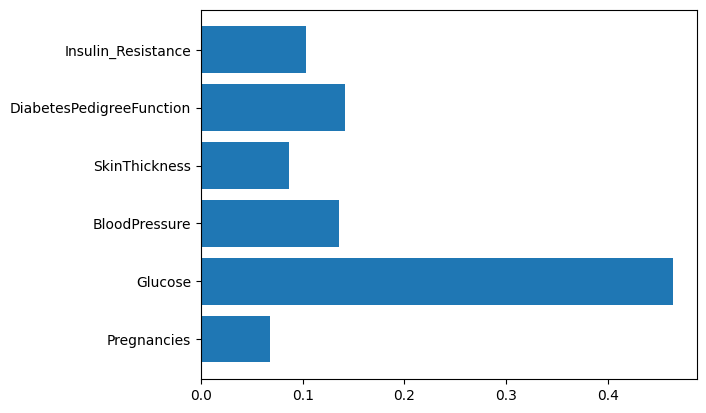

In [65]:
plt.barh(width = ml_model.feature_importances_, y = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Insulin_Resistance'])

**3.1 Learning : Loss Function**

In [66]:
# define neural network class
class PimaClassifier_ML(nn.Module):
    def __init__(self, n_feat):
        super().__init__()
        self.hidden1 = nn.Linear(n_feat, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

    def fit(self, X, y, epochs=24, batch_size=20, lr=0.01):

        # Convert to PyTorch tensors
        X_train = torch.tensor(X, dtype=torch.float32)
        y_train = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

        # Define the loss function and optimizer
        criterion = nn.BCELoss()#nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        for epoch in range(epochs):
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            if epoch % 5 == 0:
              print(f'Finished epoch {epoch}, latest loss {loss}')

    def predict(self, X):
        X_test = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
          y_pred = model(X_test)
        return y_pred.flatten().numpy().round().astype(int)

In [67]:
# define neural network class
class PimaClassifier_KBML(nn.Module):
    def __init__(self, n_feat):
        super().__init__()
        self.hidden1 = nn.Linear(n_feat, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

    def fit(self, X_train, y_train, mask, epochs=24, batch_size=20, lr=0.01):
        loss_fn_kb = CustomLoss()
        optimizer = optim.Adam(model.parameters(), lr = 0.001)
        # convert to PyTorch tensors
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
        mask = torch.tensor(mask).reshape(-1,1)
        for epoch in range(epochs):
          for i in range(0, len(X_train), batch_size):
              X_batch = X_train[i:i+batch_size]
              y_batch = y_train[i:i+batch_size]
              mask_batch = mask[i:i+batch_size]
              y_pred = model(X_batch)
              loss = loss_fn_kb(y_pred, y_batch, mask_batch, 3)
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
          if epoch % 5 == 0:
            print(f'Finished epoch {epoch}, latest loss {loss}')

    def predict(self, X_test):
        X_test = torch.tensor(X_test, dtype=torch.float32)
        with torch.no_grad():
          y_pred = model(X_test)
        return y_pred.flatten().numpy()

In [68]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target, mask, factor):
        criterion = nn.BCELoss()
        loss = criterion(output, target)
        high_cost = factor*binary_cross_entropy(output, target, weight = mask.float())
        return loss + high_cost

In [69]:
def compute_coherence(y_test, y_rule, y_pred):
  if sum(y_test == y_rule) != 0:
    return sum((y_test == y_rule) & (y_rule == y_pred.round())) / sum(y_test == y_rule)
  else:
    return np.nan

In [70]:
# split the dataset into features (X) and target (y)
X = dataset_num.iloc[:,:8].values
y = dataset_num.iloc[:, 8].values

# compute predicted outcome based on rule
dataset_rules = dataset_num.copy()
dataset_rules["Rules"] = np.nan
dataset_rules.loc[(dataset_rules["BMI"] >= 30) & (dataset_rules["Glucose"] >= 126), "Rules"] = 1
dataset_rules.loc[(dataset_rules["BMI"] <= 25) & (dataset_rules["Glucose"] <= 100), "Rules"] = 0

# identify samples correctly identified by the rules (which will be assigned heavier training weights)
mask = (dataset_rules["Rules"] == dataset_rules["Outcome"]).values

In [71]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(X, y))

# save results
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])

for r, (train_index, test_index) in enumerate(splits):
  # scale data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X[train_index,:])
  X_test = scaler.transform(X[test_index,:])
  mask_train = mask[train_index]
  y_train = y[train_index]
  y_test = y[test_index]
  y_rule = dataset_rules.loc[test_index,"Rules"].values

  # train ML model
  model = PimaClassifier_ML(X.shape[1])
  print("ML Iteration ", r)
  model.fit(X_train, y_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_ml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

  # train KB-ML model
  model = PimaClassifier_KBML(X.shape[1])
  print("KB-ML Iteration ", r)
  model.fit(X_train, y_train, mask_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_kbml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

ML Iteration  0
Finished epoch 0, latest loss 0.4691983163356781
Finished epoch 5, latest loss 0.3520393371582031
Finished epoch 10, latest loss 0.30833038687705994
Finished epoch 15, latest loss 0.27894076704978943
Finished epoch 20, latest loss 0.24582360684871674
KB-ML Iteration  0
Finished epoch 0, latest loss 1.3854155540466309
Finished epoch 5, latest loss 0.8822418451309204
Finished epoch 10, latest loss 0.7316398620605469
Finished epoch 15, latest loss 0.6253553628921509
Finished epoch 20, latest loss 0.5722833871841431
ML Iteration  1
Finished epoch 0, latest loss 0.46850574016571045
Finished epoch 5, latest loss 0.31028223037719727
Finished epoch 10, latest loss 0.25844863057136536
Finished epoch 15, latest loss 0.21514195203781128
Finished epoch 20, latest loss 0.21120132505893707
KB-ML Iteration  1
Finished epoch 0, latest loss 1.3878796100616455
Finished epoch 5, latest loss 0.7072433233261108
Finished epoch 10, latest loss 0.5273550748825073
Finished epoch 15, latest loss

In [72]:
get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.757,0.045,0.756,0.043,0.478
BA,0.721,0.052,0.748,0.049,0.055
P,0.673,0.074,0.635,0.056,0.043
R,0.603,0.096,0.720,0.093,0.000
F1,0.725,0.052,0.739,0.046,0.199
ROC,0.721,0.052,0.748,0.049,0.055
MCC,0.456,0.101,0.485,0.093,0.186
Rule,0.873,0.079,0.976,0.034,0.000


**3.2 Learning : Architecture**

In [73]:
Xml = dataset_num.values[:,:8]
y = dataset_num.values[:,8]

In [74]:
# split data according to domain rules
def split_data_rules(data):
  subset1 = data[(data["Glucose"]<=100) & (data["BMI"]<=25)]
  subset2 = data[((data["Glucose"]<=100) & (data["BMI"]> 25)) | ((data["Glucose"]> 100) & (data["Glucose"]<126)) | (data["Glucose"]>=126) & (data["BMI"]< 30)]
  subset3 = data[(data["Glucose"]>=126) & (data["BMI"]>=30)]
  return subset1, subset2, subset3

In [75]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xml, y))

# save scores
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC"])

for r, (train_index, test_index) in enumerate(splits):
  # train ML model
  ml_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(Xml[train_index,:], y[train_index])
  y_pred = ml_model.predict(Xml[test_index,:])
  scores_ml.loc[r] = get_results(y_pred, y[test_index])
  # train KB-ML model
  # fit
  data_train =  dataset_num.iloc[train_index]
  subset1, subset2, subset3 = split_data_rules(data_train)
  rf_model2 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(subset2.values[:,:8], subset2.values[:,8])
  rf_model3 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight ="balanced").fit(subset3.values[:,:8], subset3.values[:,8])
  data_test = dataset_num.iloc[test_index]
  # predict
  subtest1, subtest2, subtest3 = split_data_rules(data_test)
  data_test["Pred"] = 0
  data_test.loc[subtest2.index, "Pred"] = rf_model2.predict(subtest2.values[:,:8])
  data_test.loc[subtest3.index, "Pred"] = rf_model3.predict(subtest3.values[:,:8])
  # save results
  scores_kbml.loc[r] = get_results(data_test["Pred"].values, data_test["Outcome"].values)

get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.714,0.046,0.688,0.053,0.078
BA,0.703,0.048,0.681,0.053,0.125
P,0.582,0.062,0.548,0.069,0.078
R,0.666,0.088,0.658,0.084,0.405
F1,0.694,0.047,0.670,0.053,0.097
ROC,0.703,0.048,0.681,0.053,0.125
MCC,0.397,0.094,0.352,0.104,0.111


**4.1 Output evaluation : Learner ensemble**

In [76]:
# compute predicted outcome based on rule
dataset_rules = dataset_num.copy()
dataset_rules["Rules"] = np.nan
dataset_rules.loc[(dataset_rules["BMI"] >= 30) & (dataset_rules["Glucose"] >= 126), "Rules"] = 1
dataset_rules.loc[(dataset_rules["BMI"] <= 25) & (dataset_rules["Glucose"] <= 100), "Rules"] = 0
dataset_rules["Rules"] = dataset_rules["Rules"].fillna(0.5)

In [77]:
# split the dataset into features (X) and target (y)
X = dataset_num.iloc[:,:8].values
y = dataset_num.iloc[:, 8].values

In [78]:
# set parameters for both experiments
n_epochs = 24
batch_size = 20

In [79]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(X, y))

# save results
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])

for r, (train_index, test_index) in enumerate(splits):
  # scale data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X[train_index,:])
  X_test = scaler.transform(X[test_index,:])
  y_train = y[train_index]
  y_test = y[test_index]
  y_rule = dataset_rules.loc[test_index,"Rules"].values

  # train ML model
  model = PimaClassifier_ML(X.shape[1])
  print("ML Iteration ", r)
  model.fit(X_train, y_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_ml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

  # compute KB-ML scores
  y_pred2 = (y_pred + y_rule >= 1)*1 # ensemble with rules
  scores_kbml.loc[r] = get_results(y_pred2.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred2.round())]

ML Iteration  0
Finished epoch 0, latest loss 0.547448456287384
Finished epoch 5, latest loss 0.38367128372192383
Finished epoch 10, latest loss 0.34545135498046875
Finished epoch 15, latest loss 0.30451321601867676
Finished epoch 20, latest loss 0.2612331211566925
ML Iteration  1
Finished epoch 0, latest loss 0.5457702875137329
Finished epoch 5, latest loss 0.2662886083126068
Finished epoch 10, latest loss 0.20019780099391937
Finished epoch 15, latest loss 0.1936643272638321
Finished epoch 20, latest loss 0.18700744211673737
ML Iteration  2
Finished epoch 0, latest loss 0.38297757506370544
Finished epoch 5, latest loss 0.322733998298645
Finished epoch 10, latest loss 0.30855825543403625
Finished epoch 15, latest loss 0.2769339680671692
Finished epoch 20, latest loss 0.2760286033153534
ML Iteration  3
Finished epoch 0, latest loss 0.6445455551147461
Finished epoch 5, latest loss 0.32180288434028625
Finished epoch 10, latest loss 0.289116770029068
Finished epoch 15, latest loss 0.252880

In [80]:
get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.764,0.045,0.761,0.041,0.393
BA,0.729,0.053,0.748,0.050,0.040
P,0.683,0.075,0.647,0.059,0.009
R,0.612,0.099,0.705,0.100,0.000
F1,0.733,0.052,0.742,0.046,0.199
ROC,0.729,0.053,0.748,0.050,0.040
MCC,0.472,0.103,0.490,0.093,0.201
Rule,0.876,0.077,1.000,0.000,0.000


**Data efficiency experiment**

In [81]:
# data efficiency experiment
ml_total = scores_ml.copy()
kbml_total = scores_kbml.copy()

In [82]:
# subsample data
dataset_sample = dataset_rules.sample(n=200, random_state = 4)
# split the dataset into features (X) and target (y)
Xs = dataset_sample.iloc[:,:8].values
ys = dataset_sample.iloc[:, 8].values

In [83]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(Xs, ys))

# save results
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])

for r, (train_index, test_index) in enumerate(splits):
  # scale data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X[train_index,:])
  X_test = scaler.transform(X[test_index,:])
  y_train = y[train_index]
  y_test = y[test_index]
  y_rule = dataset_rules.loc[test_index,"Rules"].values

  # train ML model
  model = PimaClassifier_ML(X.shape[1])
  print("ML Iteration ", r)
  model.fit(X_train, y_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_ml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

  # train KB-ML model
  model = PimaClassifier_KBML(X.shape[1])
  print("KB-ML Iteration ", r)
  model.fit(X_train, y_train, mask_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_kbml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

ML Iteration  0
Finished epoch 0, latest loss 0.6699643731117249
Finished epoch 5, latest loss 0.5377794504165649
Finished epoch 10, latest loss 0.5557134747505188
Finished epoch 15, latest loss 0.5444480180740356
Finished epoch 20, latest loss 0.5165468454360962
KB-ML Iteration  0
Finished epoch 0, latest loss 1.9028782844543457
Finished epoch 5, latest loss 1.8857369422912598
Finished epoch 10, latest loss 1.8873106241226196
Finished epoch 15, latest loss 1.9428120851516724
Finished epoch 20, latest loss 2.000690221786499
ML Iteration  1
Finished epoch 0, latest loss 0.6507600545883179
Finished epoch 5, latest loss 0.5002516508102417
Finished epoch 10, latest loss 0.47658926248550415
Finished epoch 15, latest loss 0.45574092864990234
Finished epoch 20, latest loss 0.4285608232021332
KB-ML Iteration  1
Finished epoch 0, latest loss 1.8225830793380737
Finished epoch 5, latest loss 1.800044059753418
Finished epoch 10, latest loss 1.7794833183288574
Finished epoch 15, latest loss 1.74289

In [84]:
res1 = get_results_table(ml_total, kbml_total, n_1, n_train, n_test).drop(columns = "corr_p-value")
res1.columns = [s + "_total" for s in res1.columns]
res2 = get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test).drop(columns = "corr_p-value")
results = pd.concat([res1,res2], axis=1)
for c in results.index:
  results.loc[c,"p-value_ml"] = stats.ttest_ind(ml_total[c], scores_ml[c])[1].round(3)
  results.loc[c,"p-value_kbml"] = stats.ttest_ind(kbml_total[c], scores_kbml[c])[1].round(3)
results

,ML_mean_total,ML_std_total,KB-ML_mean_total,KB-ML_std_total,ML_mean,ML_std,KB-ML_mean,KB-ML_std,p-value_ml,p-value_kbml
A,0.764,0.045,0.761,0.041,0.703,0.096,0.709,0.110,0.000,0.000
BA,0.729,0.053,0.748,0.050,0.671,0.106,0.682,0.109,0.000,0.000
P,0.683,0.075,0.647,0.059,0.630,0.203,0.631,0.228,0.016,0.503
R,0.612,0.099,0.705,0.100,0.543,0.198,0.544,0.234,0.002,0.000
F1,0.733,0.052,0.742,0.046,0.663,0.108,0.662,0.132,0.000,0.000
ROC,0.729,0.053,0.748,0.050,0.671,0.106,0.682,0.109,0.000,0.000
MCC,0.472,0.103,0.490,0.093,0.358,0.216,0.379,0.217,0.000,0.000
Rule,0.876,0.077,1.000,0.000,0.863,0.150,0.835,0.220,0.439,0.000


**4.2 Output evaluation : Learner Concatenation**

In [85]:
# compute predicted outcome based on rule
dataset_rules_na = dataset_num.copy()

#expected outcome based on rules
dataset_rules_na["Rules"] = np.nan
dataset_rules_na.loc[(dataset_rules["BMI"] >= 30) & (dataset_rules_na["Glucose"] >= 126), "Rules"] = 1
dataset_rules_na.loc[(dataset_rules["BMI"] <= 25) & (dataset_rules_na["Glucose"] <= 100), "Rules"] = 0

In [86]:
# set parameters for both experiments
n_epochs = 24
batch_size = 20

In [87]:
# split the dataset into features (X) and target (y)
X = dataset_num.iloc[:,:8].values
y = dataset_num.iloc[:, 8].values

In [88]:
# set splits (10x10 repeated stratified CV)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=4)
splits = list(rskf.split(X, y))

# save results
scores_ml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])
scores_kbml = pd.DataFrame(columns=["A", "BA", "P", "R", "F1", "ROC", "MCC", "Rule"])
filtered = []

for r, (train_index, test_index) in enumerate(splits):
  # scale data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X[train_index,:])
  X_test = scaler.transform(X[test_index,:])
  y_train = y[train_index]
  y_test = y[test_index]
  y_rule = dataset_rules_na.loc[test_index,"Rules"].values

  # train ML model
  model = PimaClassifier_ML(X.shape[1])
  print("ML Iteration ", r)
  model.fit(X_train, y_train, epochs=24)
  y_pred = model.predict(X_test)
  # save scores with coherence
  scores_ml.loc[r] = get_results(y_pred.round(), y_test) + [compute_coherence(y_test, y_rule, y_pred.round())]

  # compute KB-ML scores
  filter = np.isnan(y_rule) | (y_rule == np.round(y_pred))
  scores_kbml.loc[r] = get_results(y_pred.round()[filter], y_test[filter]) + [compute_coherence(y_test[filter], y_rule[filter], y_pred.round()[filter])]

ML Iteration  0
Finished epoch 0, latest loss 0.5139837861061096
Finished epoch 5, latest loss 0.3323570489883423
Finished epoch 10, latest loss 0.30131518840789795
Finished epoch 15, latest loss 0.28158536553382874
Finished epoch 20, latest loss 0.2812020480632782
ML Iteration  1
Finished epoch 0, latest loss 0.4706806242465973
Finished epoch 5, latest loss 0.32302454113960266
Finished epoch 10, latest loss 0.29273441433906555
Finished epoch 15, latest loss 0.251501202583313
Finished epoch 20, latest loss 0.2450302094221115
ML Iteration  2
Finished epoch 0, latest loss 0.5844540596008301
Finished epoch 5, latest loss 0.3186865746974945
Finished epoch 10, latest loss 0.27934718132019043
Finished epoch 15, latest loss 0.26882219314575195
Finished epoch 20, latest loss 0.26351258158683777
ML Iteration  3
Finished epoch 0, latest loss 0.5437900424003601
Finished epoch 5, latest loss 0.2642956078052521
Finished epoch 10, latest loss 0.2475307434797287
Finished epoch 15, latest loss 0.24099

In [89]:
get_results_table(scores_ml, scores_kbml, n_1, n_train, n_test)

,ML_mean,ML_std,KB-ML_mean,KB-ML_std,corr_p-value
A,0.758,0.042,0.776,0.042,0.001
BA,0.724,0.053,0.750,0.055,0.000
P,0.671,0.070,0.671,0.070,NaN
R,0.609,0.105,0.669,0.111,0.000
F1,0.726,0.051,0.748,0.051,0.000
ROC,0.724,0.053,0.750,0.055,0.000
MCC,0.460,0.101,0.502,0.102,0.000
Rule,0.878,0.077,1.000,0.000,0.000
